In [1]:
# Trips and travel company wants to introduce new package, there are 5 pacakges currently. The marketing cost was quite 
# high earlier. the new package is wellness tourism, and the company wants to harness available data of existing 
# customers to reduce the marketing cost.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('E:\\Shirin Gangal\\Python\\Python_learning\\Udemy ML\\Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
# Data Cleaning : Handle missing values, handle duplicates, check data type
df.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['Gender']= df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']= df['MaritalStatus'].replace('Single', 'Unmarried')


In [10]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
 # Replace nan values with median for Age, duraction of Pitch, No. of Tips, Monthly Income. 
# Replace nan values with mode for Type of Contract, no. of children...
df.Age.fillna(df.Age.median(), inplace=True)

In [13]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

In [14]:
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

In [15]:
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

In [16]:
df.NumberOfTrips.fillna(0, inplace=True)

In [17]:
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.mode()[0],inplace=True)

In [18]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [19]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [20]:
df.drop('CustomerID',inplace=True, axis=1)

In [21]:
## Feature Engineering: No of PersonVisiting and No. of Children visiting can be added to one.
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'],axis=1, inplace=True)

In [22]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features', len(num_features))

Number of numerical features 12


In [23]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features', len(cat_features))

Number of categorical features 6


In [24]:
# Discrete features: fixed no of categories
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Number of discrete features', len(dis_features))

Number of discrete features 9


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y= df['ProdTaken']

In [27]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [27]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [28]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')


In [29]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [30]:
X_train= preprocessor.fit_transform(X_train)

In [31]:
X_test = preprocessor.transform(X_test)

In [32]:
# Random Forest Classifier training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score


In [33]:
models = { "Random Forest":RandomForestClassifier()
         }
for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_prec = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc = roc_auc_score(y_train, y_train_pred)

    # Test performance
    model_test_acc = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_prec = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for training')
    print("-Accuracy: {:.4f}".format(model_train_acc))
    print("-F1 score: {:.4f}".format(model_train_f1))
    print("-precision: {:.4f}".format(model_train_prec))
    print("-Recall: {:.4f}".format(model_train_recall))
    print("-roc auc: {:.4f}".format(model_train_rocauc))

    print('-------------------------------------------')
    print('Model performance for test')
    print("-Accuracy: {:.4f}".format(model_test_acc))
    print("-F1 score: {:.4f}".format(model_test_f1))
    print("-precision: {:.4f}".format(model_test_prec))
    print("-Recall: {:.4f}".format(model_test_recall))
    print("-roc auc: {:.4f}".format(model_test_rocauc))
    


    
        

Random Forest
Model performance for training
-Accuracy: 1.0000
-F1 score: 1.0000
-precision: 1.0000
-Recall: 1.0000
-roc auc: 1.0000
-------------------------------------------
Model performance for test
-Accuracy: 0.9254
-F1 score: 0.9197
-precision: 0.9538
-Recall: 0.6492
-roc auc: 0.8208


In [36]:
# The recall score is 0.6 which is low, so we need to do hyperparameter tuning
rf_params = {"max_depth":[5, 8,10, 15,20,None], "max_features":[5,7,"auto",8], "min_samples_split":[2,8,15,20],
             "n_estimators":[100, 200, 500, 1000]}
adaboost_params = {"n_estimators":[50,60,70,80,90], "algorithm":['SAMME', 'SAMME.R'],}

In [37]:
randomcv_models= [("RF", RandomForestClassifier(), rf_params), ("AB", AdaBoostClassifier(), adaboost_params)]

In [38]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random= RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=100,cv=3, verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print("f -------------- Best params for {model_name}---------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
f -------------- Best params for {model_name}---------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
f -------------- Best params for {model_name}---------
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [ ]:
#from xgboost import XGBClassifier # First install xgboost using pip 
# then add Xgboost in the models:
# "Xgboost": XGBClassifier()
# Hyperparameter tuning for Xgboost: 
# xgboost_params = {"learning_rate": [0.1, 0.01], "max_depth":[5,8,12,20,30], "n_estimators": [100,200,300], 
#"colsample_bytree": [0.5,0.8,1,0.3,0.4] } 
# do the fit to give you the best params and then check predictions using these best params. 


In [42]:
models = { "Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split=2, max_features=8, max_depth=20),
          "Adaboost":AdaBoostClassifier(n_estimators= 80, algorithm= 'SAMME') 
         }
for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_prec = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc = roc_auc_score(y_train, y_train_pred)

    # Test performance
    model_test_acc = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_prec = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for training')
    print("-Accuracy: {:.4f}".format(model_train_acc))
    print("-F1 score: {:.4f}".format(model_train_f1))
    print("-precision: {:.4f}".format(model_train_prec))
    print("-Recall: {:.4f}".format(model_train_recall))
    print("-roc auc: {:.4f}".format(model_train_rocauc))

    print('-------------------------------------------')
    print('Model performance for test')
    print("-Accuracy: {:.4f}".format(model_test_acc))
    print("-F1 score: {:.4f}".format(model_test_f1))
    print("-precision: {:.4f}".format(model_test_prec))
    print("-Recall: {:.4f}".format(model_test_recall))
    print("-roc auc: {:.4f}".format(model_test_rocauc))
    

Random Forest
Model performance for training
-Accuracy: 1.0000
-F1 score: 1.0000
-precision: 1.0000
-Recall: 1.0000
-roc auc: 1.0000
-------------------------------------------
Model performance for test
-Accuracy: 0.9325
-F1 score: 0.9279
-precision: 0.9630
-Recall: 0.6806
-roc auc: 0.8371
Adaboost
Model performance for training
-Accuracy: 0.8465
-F1 score: 0.8136
-precision: 0.7654
-Recall: 0.2551
-roc auc: 0.6186
-------------------------------------------
Model performance for test
-Accuracy: 0.8333
-F1 score: 0.7962
-precision: 0.7333
-Recall: 0.2304
-roc auc: 0.6050


In [35]:
from sklearn.ensemble import AdaBoostClassifier

models = { "Adaboost":AdaBoostClassifier()
         }
for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_prec = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc = roc_auc_score(y_train, y_train_pred)

    # Test performance
    model_test_acc = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_prec = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for training')
    print("-Accuracy: {:.4f}".format(model_train_acc))
    print("-F1 score: {:.4f}".format(model_train_f1))
    print("-precision: {:.4f}".format(model_train_prec))
    print("-Recall: {:.4f}".format(model_train_recall))
    print("-roc auc: {:.4f}".format(model_train_rocauc))

    print('-------------------------------------------')
    print('Model performance for test')
    print("-Accuracy: {:.4f}".format(model_test_acc))
    print("-F1 score: {:.4f}".format(model_test_f1))
    print("-precision: {:.4f}".format(model_test_prec))
    print("-Recall: {:.4f}".format(model_test_recall))
    print("-roc auc: {:.4f}".format(model_test_rocauc))
    



Adaboost
Model performance for training
-Accuracy: 0.8478
-F1 score: 0.8146
-precision: 0.7815
-Recall: 0.2551
-roc auc: 0.6194
-------------------------------------------
Model performance for test
-Accuracy: 0.8354
-F1 score: 0.7987
-precision: 0.7500
-Recall: 0.2356
-roc auc: 0.6083


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


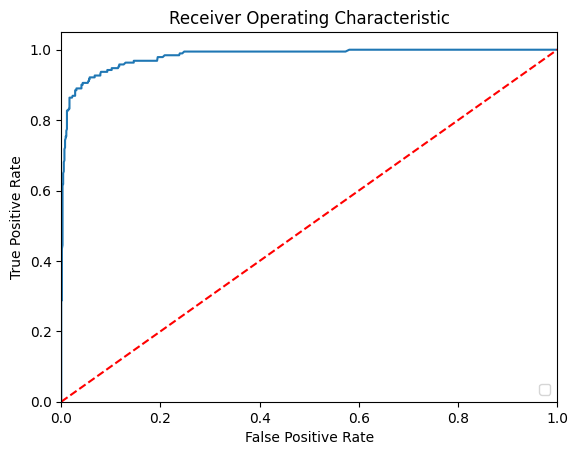

In [50]:
# Plot ROC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

auc_models= [
    { 'label': 'Random Forest Classifier',
     'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None), 'auc':0.8325},]

for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 



    
